## Mastery Checkpoint - Gaussian vs. Simple Naive Bayes Classifier
#### By: Killian Brait

### Introduction
In this notebook we will compare the performance of gaussian vs. simple naive Bayes classifier models on two different datasets. One will be a "image recognition" dataset, and one will be a dataset with more significant ethical implications. We will also compare and discuss the feature importance of each model on each dataset.



### Dataset Information - WIP

To Do: Change to the actual datasets that will be used (not titanic)

In [8]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [38]:
# Heart Disease dataset: 
# https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease 

heart_df = pd.read_csv(Path.cwd() / 'data' / 'heart_2020_cleaned.csv')
display(heart_df.head())
heart_df.info()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [6]:
# Frtuit dataset: (from class)

fruit_df = pd.read_csv(Path.cwd() / 'data' / 'fruit_data_with_colours.csv')
display(fruit_df.head())
fruit_df.info()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


In [37]:
heart_df['AgeCategory'].value_counts()

65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64

In [39]:
## Data Processing

# turn No/Yes into 0/1
heart_df = heart_df.replace({'No': 0, 'Yes': 1})

# drop Race, GenHealth, and Sex 
heart_df.drop(["Sex", "Race", "GenHealth"], axis=1, inplace=True)

# drop AgeCategory so there is no binning
heart_df.drop(["AgeCategory"], axis=1, inplace=True)

# drop rows with missing values
heart_df.dropna(inplace=True)


heart_df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Diabetic,PhysicalActivity,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,1,1,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,1,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,0,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,1,8.0,0,0,0


<AxesSubplot:>

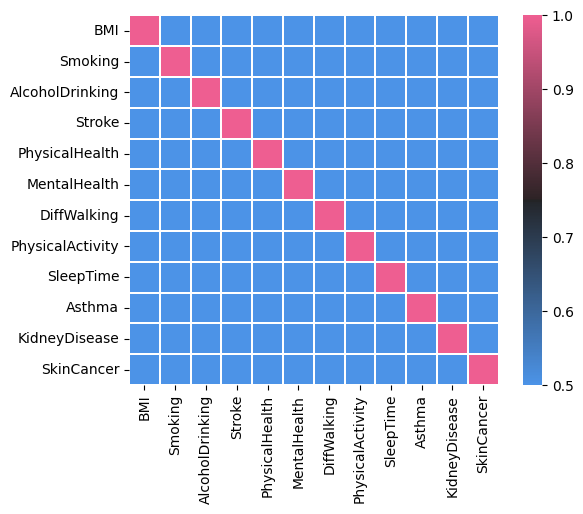

In [40]:
heart_df['HeartDisease'].hist()

features = heart_df.drop('HeartDisease', axis=1)

corr = features.corr(method='pearson')
cmap = sns.diverging_palette(250,354,80,60,center="dark",as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=.5, cmap=cmap, square=True, linewidths=.2)

# all features are independent of each other based on a pearson correlation
# therefore naive bayes is a good model to use


<AxesSubplot:xlabel='PhysicalHealth', ylabel='Count'>

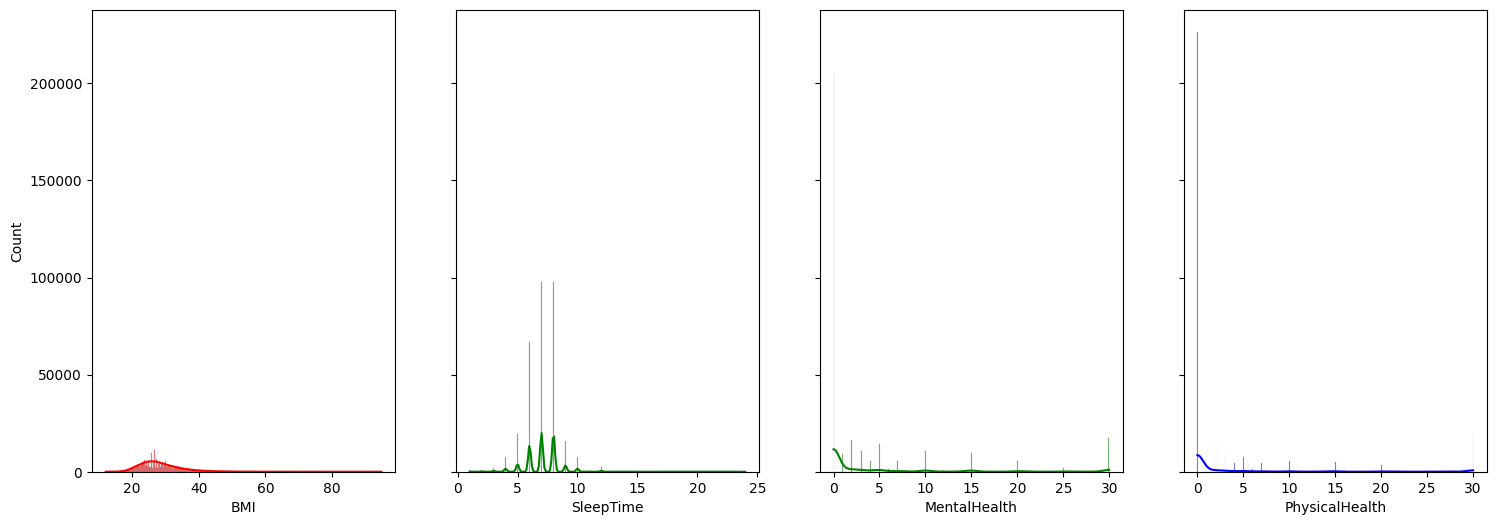

In [44]:
fig, axes = plt.subplots(1, 4, figsize=(18, 6), sharey=True)
sns.histplot(data=heart_df, ax=axes[0], x='BMI', kde=True, color='r')
sns.histplot(data=heart_df, ax=axes[1], x='SleepTime', kde=True, color='g')
sns.histplot(data=heart_df, ax=axes[2], x='MentalHealth', kde=True, color='g')
sns.histplot(data=heart_df, ax=axes[3], x='PhysicalHealth', kde=True, color='b')

In [ ]:
# drop MentalHealth and PhysicalHealth because they are not normally distributed
heart_df.drop(["MentalHealth", "PhysicalHealth"], axis=1, inplace=True)